Media a posteriori a lui λ: 17.8317
Modul a posteriori al lui λ: 17.8218
Intervalul HDI de 94% pentru λ: [17.0498, 18.6303]



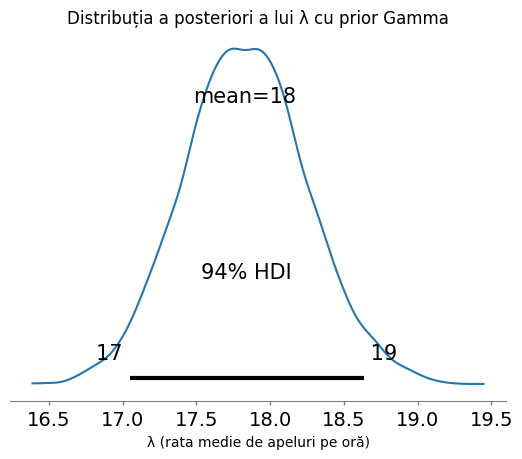

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

# Datele de intrare
k = 180   # Numărul total de apeluri observate
T = 10    # Intervalul de timp în ore

# 181/11 = 16.5ish
# Parametrii distributiei prior Gamma
alpha_prior = 1
beta_prior = 1
# alpha/beta = mean

# Functie distributie priori gamma
prior_pdf = stats.gamma(a=alpha_prior, scale=1/beta_prior)

# Parametrii distributiei posterior Gamma
alpha_posterior = alpha_prior + k*10
beta_posterior = beta_prior + T*10

# Functie distributie posterior gamma
posterior_pdf = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)

mean_lambda = posterior_pdf.mean()
mode_lambda = (alpha_posterior - 1) / beta_posterior if alpha_posterior > 1 else 0

print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")
lower_bound, upper_bound = posterior_pdf.interval(confidence=0.94)
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

lambda_samples = posterior_pdf.rvs(10000)
az.plot_posterior(lambda_samples, hdi_prob=0.94)
plt.title("Distribuția a posteriori a lui λ cu prior Gamma")
plt.xlabel("λ (rata medie de apeluri pe oră)")
plt.show()
